In [1]:
## This notebook is a test environment for writing/reading config files in yaml format...
    ## I want to store important parameters for saving time on reading in data in the future...

## First, import general packages for running python analysis:
import os
import numpy as np
from matplotlib.pyplot import *
import h5py
import datetime
import pytz
from scipy.optimize import least_squares
import yaml
import glob

## Then, import the beamcals module packages and initialize 'gbosite' class:
from beamcals import corr
from beamcals import concat
from beamcals import drone
from beamcals import bicolog
import beamcals.plotting_utils as pu
import beamcals.fitting_utils as fu
import beamcals.geometry_utils as gu
import beamcals.time_utils as tu
from beamcals.sites import site
gbosite=site.site('../beamcals/beamcals/sites/GBO_config.npz')

Initializing Correlator Class using:
  --> /hirax/GBO_Aug_2021/TONE_ACQ/20210826T182904Z_yale_drone/corr/20210826T182915Z/
  --> Arrays initialized with shape (124, 256, 1024, 16)
Assigning array values by reading in data files:
  --> Loading File: 0123/0123
  --> Finished. Reshaping arrays.
Initializing drone data via datcon_csv routine: FLY533.csv
  --> Skipping rows 1 to 499 to eliminate NAN values
  --> Attempting to load position data from RTK
    --> RTK data contains 13308/13308 non-nan values
Timestamp interpolation succeeded
  --> generating llh, geocentric cartesian, local cartesian, and local spherical coordinates.
  --> generating dish and receiver line of sight coordinates.
Initializing CONCAT CLASS with active traceback using:
  --> /hirax/GBO_Aug_2021/TONE_ACQ/20210826T182904Z_yale_drone/corr/20210826T182915Z/
  --> FLY533.csv
Creating directory for saving traceback and analysis outputs:
  --> /hirax/GBO_Analysis_Outputs/FLY533_20210826T182904Z_ver_20220819T151507/
Searc

/home/tyndall/anaconda3/lib/python3.8/site-packages/beamcals/concat.py:314: RuntimeWarning: Mean of empty slice
  self.V_bg[k,:,:]=np.nanmean(self.V[t_window,:,:],axis=0)


  --> Background subtraction completed using window_size = 5
Synchronizing data from correlator and drone:
  --> Loading parameter from existing configuration file: t_delta_dji = -1.32000000000003
Applying a time correction of -1.32 seconds using Channel 1.0 fits.
  --> Variable synchronation successful, generating output plots:
  --> Saving output plot.
Preparing to export configuration file:
  --> Checking directory for config_FLY533_20210826T182904Z.yaml:
    --> FILE EXISTS
    --> preparing to write a new versioned configuration file...
    --> file saved successfully
Performing 2DGauss and Airy fits for [16]chans x [1024]freqs:


/home/tyndall/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/tyndall/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:3875: PearsonRNearConstantInputWarning: An input array is nearly constant; the computed correlation coefficent may be inaccurate.
  warnings.warn(PearsonRNearConstantInputWarning())


  --> Saving output fit parameters as an .npz filetype:
  --> FLY533_20210826T182904Z_ver_20220819T151507_2dGauss_and_Airy_Params.npz


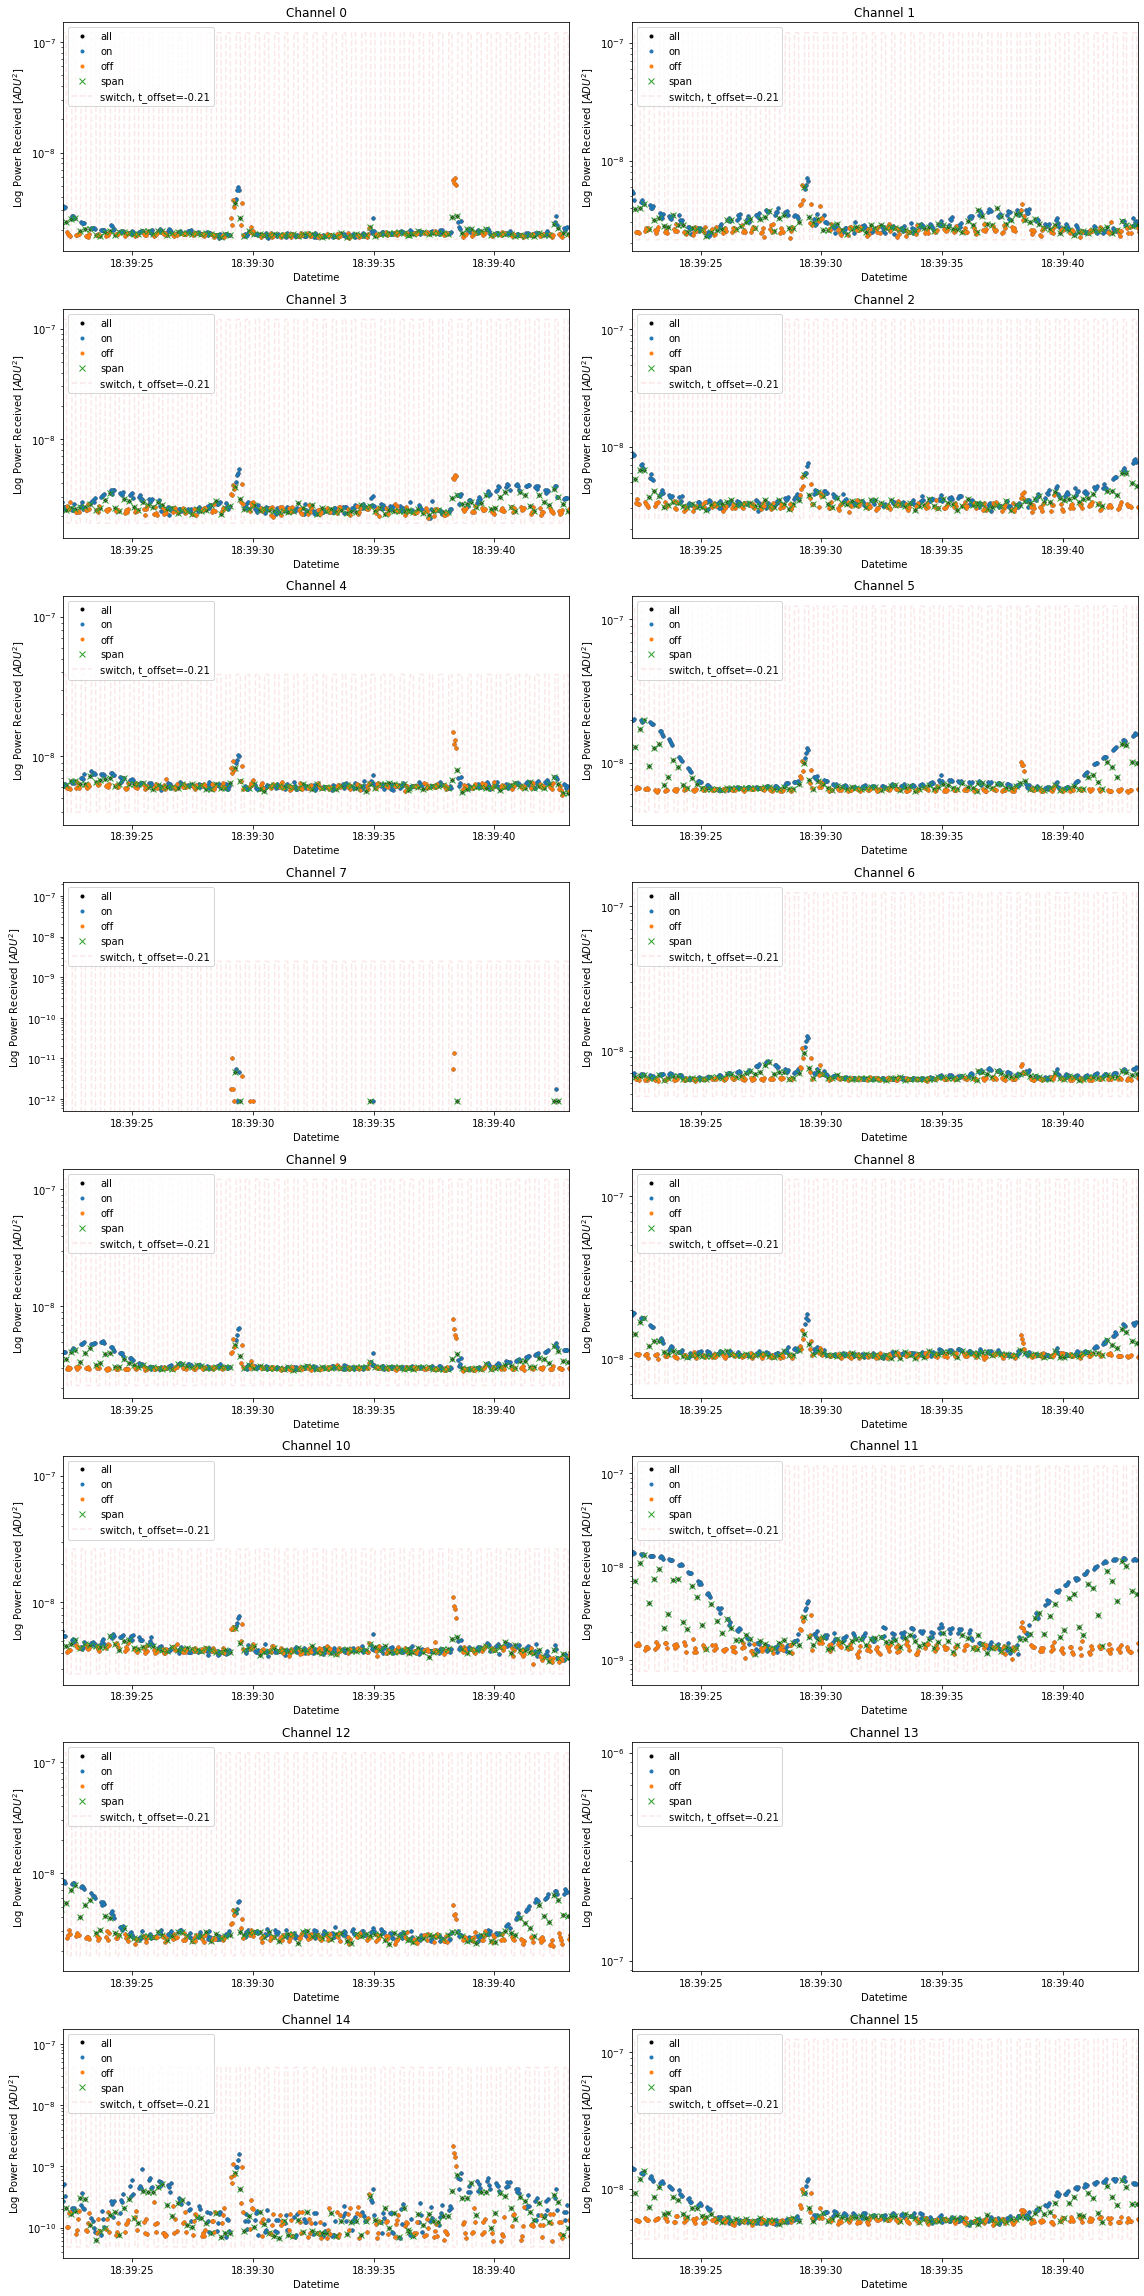

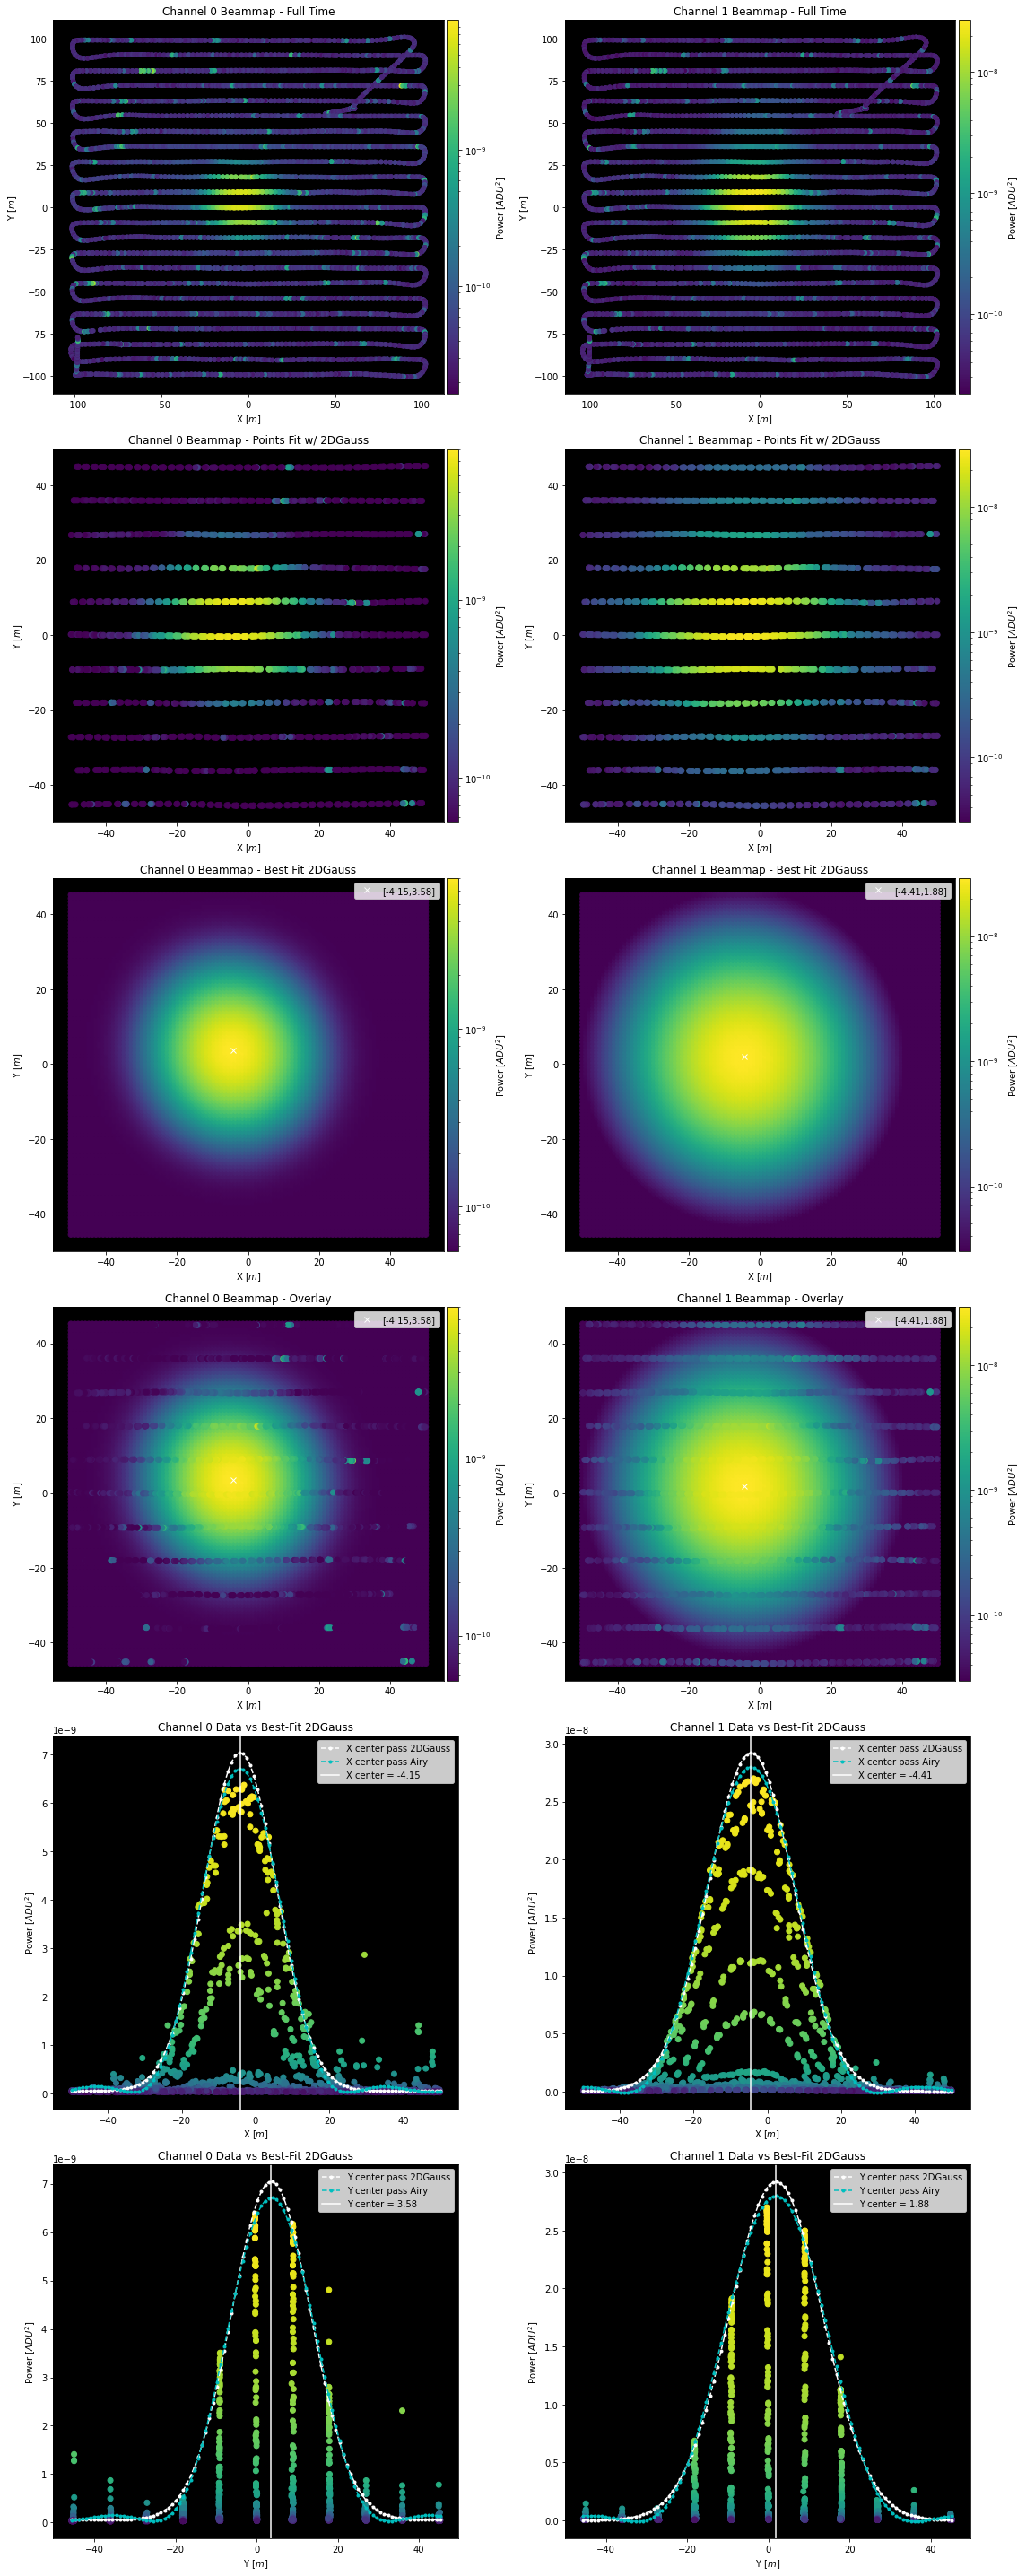

In [2]:
## 1) 0825 -- Flight from 20210826T185621: Comments only include "Large Grid 3"
#stop #prevent rerun
## Read in the Corr_Data class:
datadir='/hirax/GBO_Aug_2021/TONE_ACQ/20210826T182904Z_yale_drone/corr/20210826T182915Z/'
gaindir='/hirax/GBO_Aug_2021/TONE_ACQ/digital_gains/20210826T182904Z_yale_drone_yale_digitalgain/'
corrtest0825=corr.Corr_Data(Data_Directory=datadir,Gain_Directory=gaindir,site_class=gbosite)

## Read in the Drone_Data class:
dronedir='/hirax/all_drone_data/datcon_csv/'
dronetest0825=drone.Drone_Data(Drone_Directory=dronedir,FLYTAG='FLY533.csv',site_class=gbosite)

## Since we know the data are from the same time we can combine them with the Concat_Class:
#plot(dronetest0825.t_arr_datetime)
#plot(corrtest0825.t_arr_datetime)
concattest0825=concat.CONCAT(CORRDATCLASS=corrtest0825,DRONEDATCLASS=dronetest0825)
## Use the Extract_Source_Pulses and Perform_Background_Subtraction functions:
concattest0825.Extract_Source_Pulses(Period=0.4e6,Dutycycle=0.2e6,t_bounds=[14500,15000])
concattest0825.Perform_Background_Subtraction()
concattest0825.Synchronization_Function(inputcorr=corrtest0825,inputdrone=dronetest0825,FMB_coordbounds=[50.0,50.0,150.0],FMB_ampbound=0.999)
concattest0825.Export_yaml()
concattest0825.Main_Beam_Fitting()

In [3]:
## Saving output data as .npz:
np.savez("/home/tyndall/yale_0825_ajith_datazip.npz",\
    t=concattest0825.t_arr_datetime,
    x=concattest0825.drone_xyz_LC_interp[:,0],
    y=concattest0825.drone_xyz_LC_interp[:,1],
    z=concattest0825.drone_xyz_LC_interp[:,2],
    V=concattest0825.V[:,:,1],
    V_bgsub=concattest0825.V_bgsub[:,:,1],
    V_bg=concattest0825.V_bg[:,:,1],
    i_on=concattest0825.inds_on,
    f=concattest0825.freq)

## Loading npz data:
#dat=np.load("/home/tyndall/yale_0825_ajith_datazip.npz")
#for i in list(dat.keys()):
#    print (i)


stop

NameError: name 'stop' is not defined

Initializing Correlator Class using:
  --> /hirax/GBO_Aug_2021/TONE_ACQ/20210826T185621Z_yale_drone/corr/20210826T185632Z/
  --> Arrays initialized with shape (97, 256, 1024, 8)
Assigning array values by reading in data files:
  --> Loading File: 0096/0096
  --> Finished. Reshaping arrays.
Initializing drone data via datcon_csv routine: FLY534.csv
  --> Skipping rows 1 to 499 to eliminate NAN values
  --> Attempting to load position data from RTK
    --> RTK data contains 12316/12316 non-nan values
Timestamp interpolation succeeded
  --> generating llh, geocentric cartesian, local cartesian, and local spherical coordinates.
  --> generating dish and receiver line of sight coordinates.
Initializing CONCAT CLASS with active traceback using:
  --> /hirax/GBO_Aug_2021/TONE_ACQ/20210826T185621Z_yale_drone/corr/20210826T185632Z/
  --> FLY534.csv
Creating directory for saving traceback and analysis outputs:
  --> /hirax/GBO_Analysis_Outputs/FLY534_20210826T185621Z_ver_20220819T120232/
Searchi

/home/tyndall/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


  --> Saving output fit parameters as an .npz filetype:
  --> FLY534_20210826T185621Z_ver_20220819T120232_2dGauss_and_Airy_Params.npz


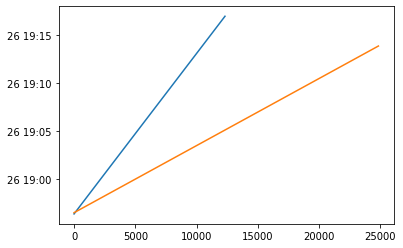

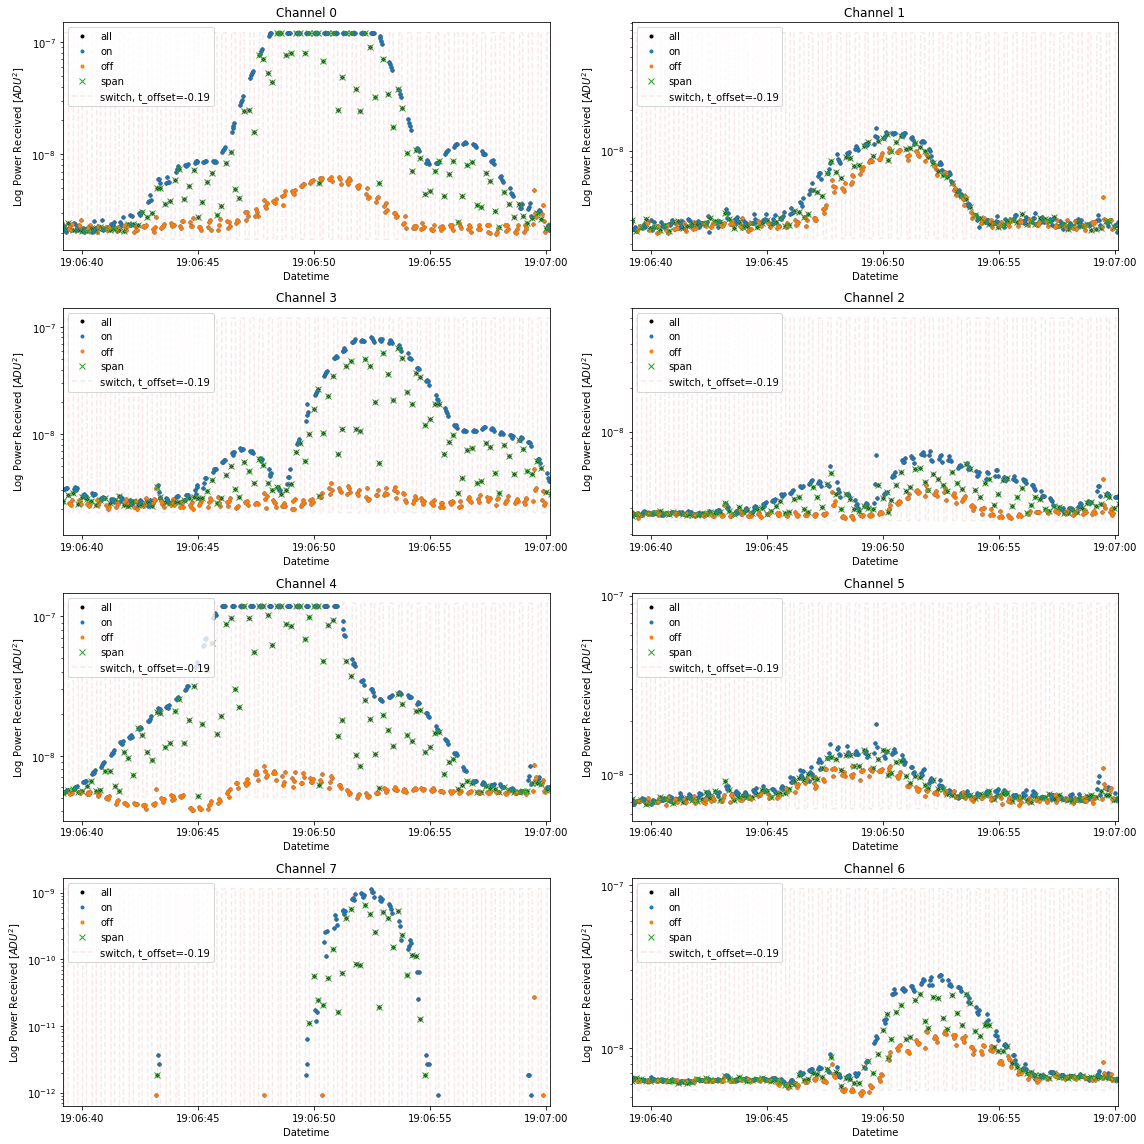

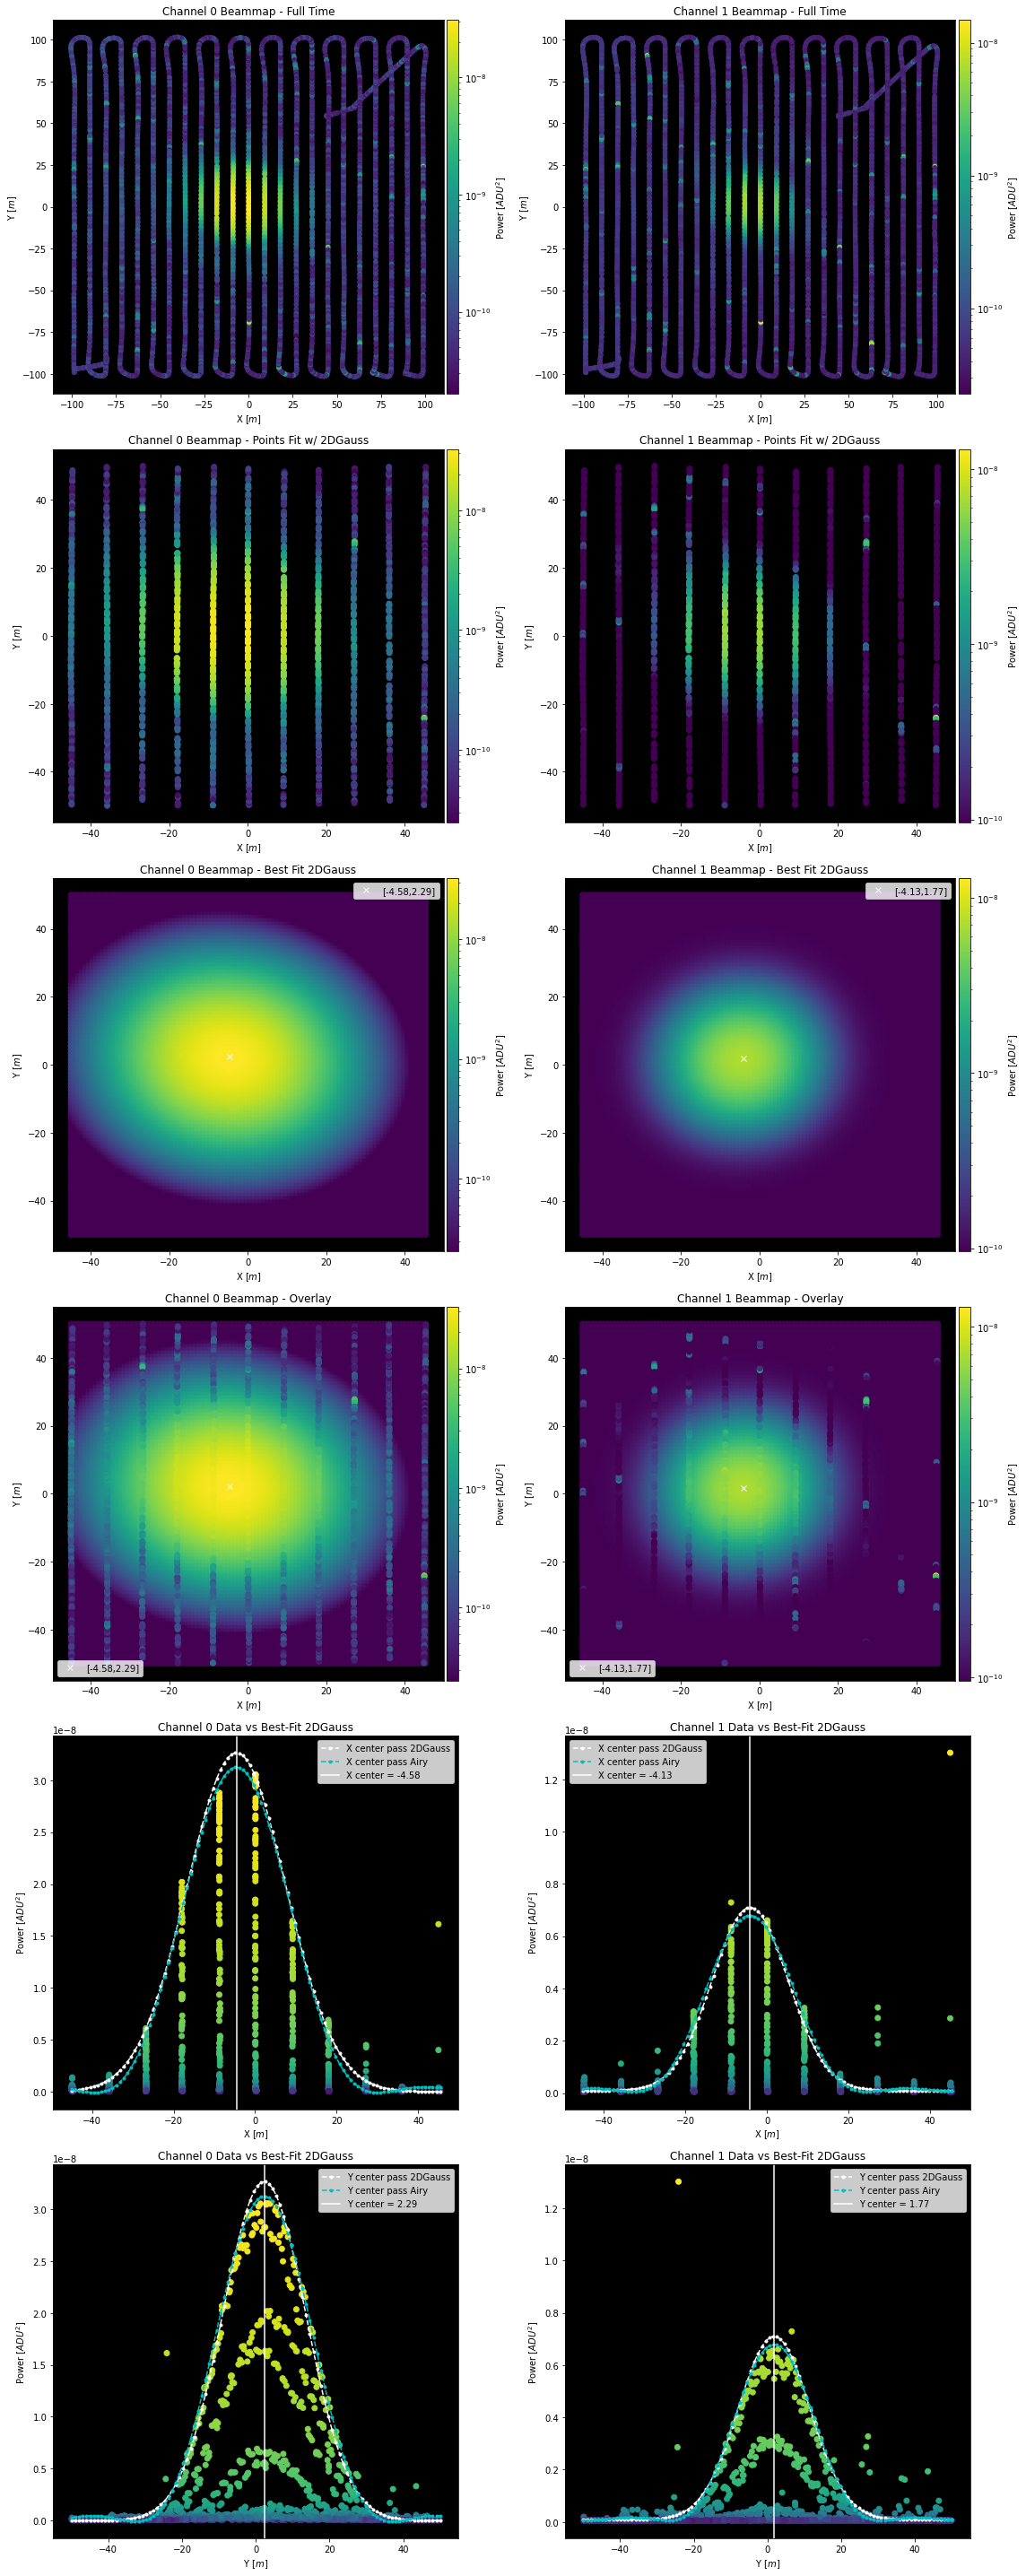

In [3]:
## 2) 0826 -- Flight from 20210826T185621: Comments only include "Large Grid 3"

## Read in the Corr_Data class:
datadir='/hirax/GBO_Aug_2021/TONE_ACQ/20210826T185621Z_yale_drone/corr/20210826T185632Z/'
gaindir='/hirax/GBO_Aug_2021/TONE_ACQ/digital_gains/20210826T185621Z_yale_drone_yale_digitalgain/'
corrtest0826=corr.Corr_Data(Data_Directory=datadir,Gain_Directory=gaindir,site_class=gbosite)

## Read in the Drone_Data class:
dronedir='/hirax/all_drone_data/datcon_csv/'
dronetest0826=drone.Drone_Data(Drone_Directory=dronedir,FLYTAG='FLY534.csv',site_class=gbosite)

## Since we know the data are from the same time we can combine them with the Concat_Class:
plot(dronetest0826.t_arr_datetime)
plot(corrtest0826.t_arr_datetime)
concattest0826=concat.CONCAT(CORRDATCLASS=corrtest0826,DRONEDATCLASS=dronetest0826)

## Use the Extract_Source_Pulses and Perform_Background_Subtraction functions:
concattest0826.Extract_Source_Pulses(Period=0.4e6,Dutycycle=0.2e6,t_bounds=[14500,15000])
concattest0826.Perform_Background_Subtraction()
concattest0826.Synchronization_Function(inputcorr=corrtest0826,inputdrone=dronetest0826)
concattest0826.Export_yaml()
concattest0826.Main_Beam_Fitting()

In [ ]:
## 3) 1021 -- Flight from 20210826T185621: Comments only include "Large Grid 3"

## Read in the Corr_Data class:
datadir='/hirax/GBO_Oct_2021/TONE_ACQ/20211021T144905Z_yale_drone/corr/20211021T144917Z/'
gaindir='/hirax/GBO_Oct_2021/TONE_ACQ/digital_gains/20211021T144905Z_yale_drone_yale_digitalgain/'
corrtest1021=corr.Corr_Data(Data_Directory=datadir,Gain_Directory=gaindir,site_class=gbosite)

## Read in the Drone_Data class:
dronedir='/hirax/all_drone_data/datcon_csv/'
dronetest1021=drone.Drone_Data(Drone_Directory=dronedir,FLYTAG='FLY613.csv',site_class=gbosite)

## Since we know the data are from the same time we can combine them with the Concat_Class:
plot(dronetest1021.t_arr_datetime)
plot(corrtest1021.t_arr_datetime)
concattest1021=concat.CONCAT(CORRDATCLASS=corrtest1021,DRONEDATCLASS=dronetest1021)

## Use the Extract_Source_Pulses and Perform_Background_Subtraction functions:
concattest1021.Extract_Source_Pulses(Period=0.4e6,Dutycycle=0.2e6,t_bounds=[12400,12800])
concattest1021.Perform_Background_Subtraction()
concattest1021.Synchronization_Function(inputcorr=corrtest1021,inputdrone=dronetest1021)
concattest1021.Export_yaml()
concattest1021.Main_Beam_Fitting()

Initializing Correlator Class using:
  --> /hirax/GBO_Oct_2021/TONE_ACQ/20211021T144905Z_yale_drone/corr/20211021T144917Z/
  --> Arrays initialized with shape (97, 256, 1024, 16)
Assigning array values by reading in data files:
  --> Loading File: 0023/0096

In [ ]:
## Trying to examine time offsets from different flights to look for patterns/systematic issues:
## 4) 1022 -- Flight from 20211022T194308: Comments only include "Big Grid 4"

## Read in the Corr_Data class:
datadir='/hirax/GBO_Oct_2021/TONE_ACQ/20211022T194308Z_yale_drone/corr/20211022T194320Z/'
gaindir='/hirax/GBO_Oct_2021/TONE_ACQ/digital_gains/20211022T194308Z_yale_drone_yale_digitalgain/'
corrtest1022=corr.Corr_Data(Data_Directory=datadir,Gain_Directory=gaindir,site_class=gbosite)

## Read in the Drone_Data class:
dronedir='/hirax/all_drone_data/datcon_csv/'
dronetest1022=drone.Drone_Data(Drone_Directory=dronedir,FLYTAG='FLY649.csv',site_class=gbosite)

## Since we know the data are from the same time we can combine them with the Concat_Class:
plot(dronetest1022.t_arr_datetime)
plot(corrtest1022.t_arr_datetime)
concattest1022=concat.CONCAT(CORRDATCLASS=corrtest1022,DRONEDATCLASS=dronetest1022)

## Use the Extract_Source_Pulses and Perform_Background_Subtraction functions:
concattest1022.Extract_Source_Pulses(Period=0.4e6,Dutycycle=0.2e6,t_bounds=[12400,12800])
concattest1022.Perform_Background_Subtraction()
concattest1022.Synchronization_Function(inputcorr=corrtest1022,inputdrone=dronetest1022)
concattest1022.Export_yaml()
concattest1022.Main_Beam_Fitting()

In [ ]:
#plot(concattest0825.freq,G_popt[1,:,0],'.')
## FWHM in meters (x,y) and degrees in FoV:
#Afwhmm_f=2*1.616/3.832*AFit_f_params[:,:,3]
#Afwhmd_f=2*180.0/np.pi*np.arctan(1.616/3.832*AFit_f_params[:,:,3]/np.nanmean(mbz))


#pG=np.array([amp0,x00,xsig0,y00,ysig0,theta0,bg0])

    
Gfwhmxm_f=2.355*G_popt[:,:,2]
Gfwhmxd_f=2*180.0/np.pi*np.arctan(0.5*2.355*G_popt[:,:,2]/np.nanmean([175]))
Gfwhmym_f=2.355*G_popt[:,:,4]
Gfwhmyd_f=2*180.0/np.pi*np.arctan(0.5*2.355*G_popt[:,:,4]/np.nanmean([175]))

wavelength_m=(3.0*(10.0**8.0))/(concattest0825.freq*1.0e6)
difflimit=180.0/np.pi*1.22*wavelength_m

fwhms_bensims_f=np.linspace(400,800,9)
fwhms_bensims_E = [8.9, 7.9, 6.7, 6.1, 5.5, 5.1, 4.9, 6.6, 4.7]
fwhms_bensims_H = [7.7, 6.9, 6.3, 5.8, 5.3, 5, 5.2, 4, 4.2]
    
g=1   
    
fig1=figure(figsize=(16,40))
for g in range(16):
    ax=fig1.add_subplot(8,2,int(g+1))
    ax.plot(concattest0825.freq,Gfwhmxd_f[g],'.',label="BF2DGauss FWHM X")
    ax.plot(concattest0825.freq,Gfwhmyd_f[g],'.',label="BF2DGauss FWHM Y")
    ax.plot(concattest0825.freq,difflimit/6.0,'k-',markersize=0.5,label="Diffraction Limit D=6$m$")
    ax.plot(concattest0825.freq,difflimit/4.5,'k--',markersize=0.5,label="Diffraction Limit D=4.5$m$")
    ax.plot(fwhms_bensims_f,fwhms_bensims_E,'kv--',label="Simulated FWHM E")
    ax.plot(fwhms_bensims_f,fwhms_bensims_H,'kx--',label="Simulated FWHM H")
    ax.legend(loc=1)
    ax.set_ylabel("FWHM [$deg$]")
    ax.set_xlabel("Freq [$MHz$]")
    ax.set_title("Best-Fit FWHM [$deg$] Parameters From Beam Fits")
    ax.set_ylim(0,12)
tight_layout()

fig2=figure(figsize=(16,40))
for g in range(16):
    ax=fig2.add_subplot(8,2,int(g+1))
    ax.semilogy(concattest0825.freq,np.nanmax(concattest0825.V[:,:,g],axis=0),'.',label="Maximum Best-Fit")
    ax.semilogy(concattest0825.freq,G_popt[g,:,0],'.',label="Maximum Best-Fit")
    ax.semilogy(concattest0825.freq,G_popt[g,:,6],'.',label="Background")
    ax.legend(loc=1)
    ax.set_ylabel("Amplitude [$ADU^2$]")
    ax.set_xlabel("Freq [$MHz$]")
    ax.set_title("Best-Fit Amplitude [$deg$] Parameters From Beam Fits")
tight_layout()